# Regluarization comparison for multilayer perceptron networks, D/dataC
This notebooks looks to examplify how various levels of regularization can affect the results of a multiplayer perceptron model, using the simulated data set D/dataC. The layer sizes and hyperparameters are predefined to a set of values aiming to give a credible results without the need for any extensive grid search.

In [1]:
# %load example_D_regularization_comparison.py
from api import Api
mlApi = Api()

Using TensorFlow backend.


## Features and targets
Model B, with the addition of an inlet pressure sensor (which is constant), is chosen for this exemplification. The following features and targets are used:

Features: Process T in, Process T out, Process P in, Process Flow, Cooling T in, Cooling P in, Cooling valve opening

Targets: Cooling T out

In [2]:
# define dataset specifics
filename = "../master-thesis-db/datasets/D/dataC.csv"

columns = [
    ['20TT001', 'Gas side inlet temperature', 'degrees'],
    ['20PT001', 'Gas side inlet pressure', 'barG'],
    ['20FT001', 'Gas side flow', 'M^3/s'],
    ['20TT002', 'Gas side outlet temperature', 'degrees'],
    ['20PDT001', 'Gas side pressure difference', 'bar'],
    ['50TT001', 'Cooling side inlet temperature', 'degrees'],
    ['50PT001', 'Cooling side inlet pressure', 'barG'],
    ['50FT001', 'Cooling side flow', 'M^3/s'],
    ['50TT002', 'Cooling side outlet temperature', 'degrees'],
    ['50PDT001', 'Cooling side pressure differential', 'bar'],
    ['50TV001', 'Cooling side valve opening', '%'],
]

irrelevantColumns = [
    '50FT001',
    '50PDT001',
    '20PDT001',
]

targetColumns = [
    '50TT002',
]

traintime = [
        ["2020-01-01 00:00:00", "2020-04-01 00:00:00"],
    ]

testtime = [
    "2020-01-01 00:00:00",
    "2020-08-01 00:00:00"
]

## Models
Hidden layer sizes of 1x64 and 2x64 neurons are chosen as they are assumed complex enough to discover possible nonlinearities while still avoiding overfitting due to model complexity. A number of epochs ensuring model convergence is chosen, together with EarlyStopping and ModelCheckpoint callbacks that ensure the best set of weights are stored for predictive use.

Seven different rates of both Lasso and Ridge regularization are added, in addition to a linear model and a model using dropout. 

In [3]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

mlpr1 = mlApi.MLP('MLPr 1x 64 1.0', layers=[64], l1_rate=1.0, l2_rate=1.0, epochs=2500)
mlpr2 = mlApi.MLP('MLPr 1x 64 0.5', layers=[64], l1_rate=0.5, l2_rate=0.5, epochs=2500)
mlpr3 = mlApi.MLP('MLPr 1x 64 0.1', layers=[64], l1_rate=0.1, l2_rate=0.1, epochs=2500)
mlpr4 = mlApi.MLP('MLPr 1x 64 0.05', layers=[64], l1_rate=0.05, l2_rate=0.05, epochs=2500)
mlpr5 = mlApi.MLP('MLPr 1x 64 0.01', layers=[64], l1_rate=0.01, l2_rate=0.01, epochs=2500)
mlpr6 = mlApi.MLP('MLPr 1x 64 0.005', layers=[64], l1_rate=0.005, l2_rate=0.005, epochs=5000)
mlpr7 = mlApi.MLP('MLPr 1x 64 0.001', layers=[64], l1_rate=0.001, l2_rate=0.001, epochs=5000)
mlpd = mlApi.MLP('MLPd 1x 64', layers=[64], dropout=0.2, epochs=2500)

mlpr11 = mlApi.MLP('MLPr 2x 64 1.0', layers=[64, 64], l1_rate=1.0, l2_rate=1.0, epochs=5000)
mlpr22 = mlApi.MLP('MLPr 2x 64 0.5', layers=[64, 64], l1_rate=0.5, l2_rate=0.5, epochs=5000)
mlpr33 = mlApi.MLP('MLPr 2x 64 0.1', layers=[64, 64], l1_rate=0.1, l2_rate=0.1, epochs=5000)
mlpr44 = mlApi.MLP('MLPr 2x 64 0.05', layers=[64, 64], l1_rate=0.05, l2_rate=0.05, epochs=5000)
mlpr55 = mlApi.MLP('MLPr 2x 64 0.01', layers=[64, 64], l1_rate=0.01, l2_rate=0.01, epochs=5000)
mlpr66 = mlApi.MLP('MLPr 2x 64 0.005', layers=[64, 64], l1_rate=0.005, l2_rate=0.005, epochs=5000)
mlpr77 = mlApi.MLP('MLPr 2x 64 0.001', layers=[64, 64], l1_rate=0.001, l2_rate=0.001, epochs=5000)
mlpdd = mlApi.MLP('MLPd 2x 64', layers=[64, 64], dropout=0.2, epochs=5000)

linear_r = mlApi.Linear_Regularized('linear')

Columns before removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 20PDT001 - Gas side pressure difference
Col. 5 : 50TT001 - Cooling side inlet temperature
Col. 6 : 50PT001 - Cooling side inlet pressure
Col. 7 : 50FT001 - Cooling side flow
Col. 8 : 50TT002 - Cooling side outlet temperature
Col. 9 : 50PDT001 - Cooling side pressure differential
Col. 10 : 50TV001 - Cooling side valve opening

Columns after removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 50TT001 - Cooling side inlet temperature
Col. 5 : 50PT001 - Cooling side inlet pressure
Col. 6 : 50TT002 - Cooling side outlet temperature
Col. 7 : 50TV001 - Cooling side valve opening

Finding data between 2020-01-01 00:00:00 and 2020-04-01 00:00:00
Found 363 rows



Model MLPr 1x 64 1.0 was loaded from file
Model MLPr 1x 64 0.5 was loaded from file
Model MLPr 1x 64 0.1 was loaded from file
Model MLPr 1x 64 0.05 was loaded from file
Model MLPr 1x 64 0.01 was loaded from file
Model MLPr 1x 64 0.005 was loaded from file
Model MLPr 1x 64 0.001 was loaded from file
Model MLPd 1x 64 was loaded from file
Training model linear
+------------------+-----------+-------------+---------------+--------+
|      Model       | Min. loss | Chosen loss | Min. val loss | Epochs |
+------------------+-----------+-------------+---------------+--------+
|  MLPr 1x 64 1.0  |  1.180663 |   1.180857  |    0.30035    |  2500  |
|  MLPr 1x 64 0.5  |  1.180668 |   1.182572  |    0.300304   |  2500  |
|  MLPr 1x 64 0.1  |  1.180655 |   1.180858  |    0.301255   |  2500  |
| MLPr 1x 64 0.05  |  1.180665 |   1.180957  |    0.302332   |  2500  |
| MLPr 1x 64 0.01  |  0.17645  |   0.183803  |    0.055145   |  2500  |
| MLPr 1x 64 0.005 |  0.049036 |   0.050182  |    0.015982   |  

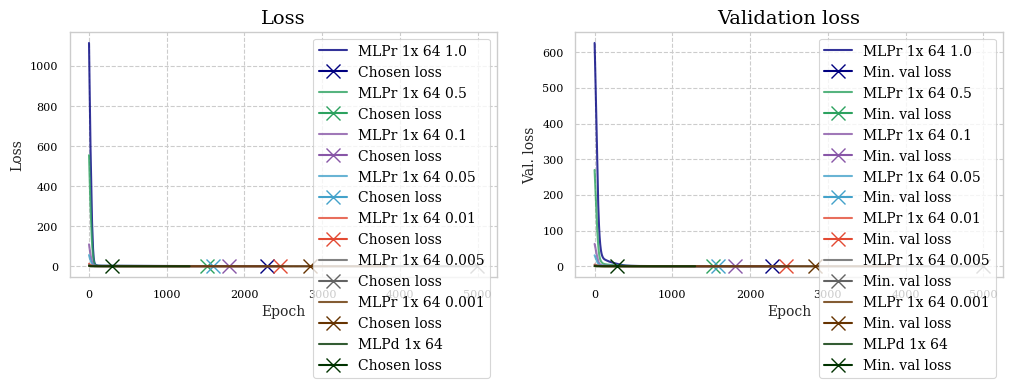

Model prediction scores
+------------------+-------------+------------+
|      Model       | Train score | Test score |
+------------------+-------------+------------+
|  MLPr 1x 64 1.0  |   -0.0038   |   -0.04    |
|  MLPr 1x 64 0.5  |   -0.0035   |  -0.0392   |
|  MLPr 1x 64 0.1  |   -0.0039   |  -0.0405   |
| MLPr 1x 64 0.05  |   -0.0041   |  -0.0409   |
| MLPr 1x 64 0.01  |    0.9896   |   0.9259   |
| MLPr 1x 64 0.005 |    0.9975   |   0.9313   |
| MLPr 1x 64 0.001 |    0.9976   |   0.9354   |
|    MLPd 1x 64    |    0.9976   |   0.922    |
|      linear      |    0.9961   |   0.9031   |
+------------------+-------------+------------+


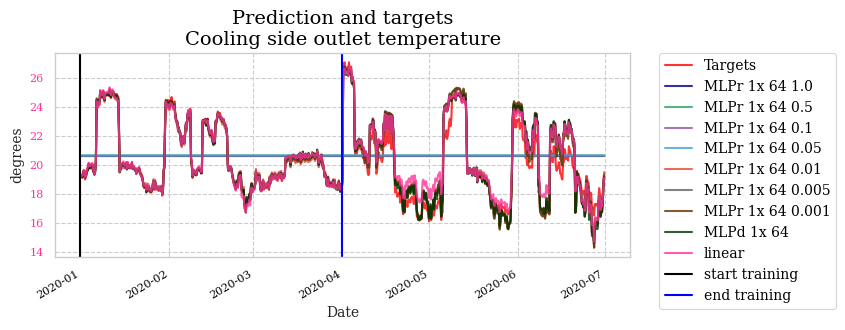

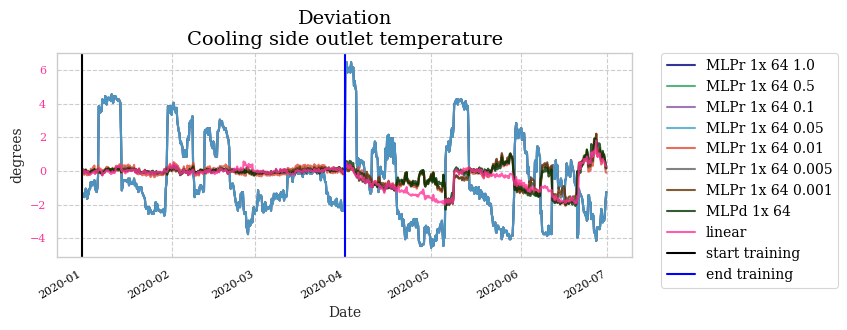

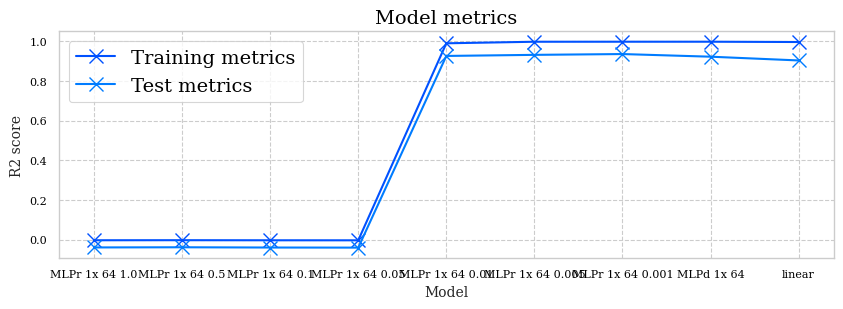

In [4]:
modelList = [
    mlpr1,
    mlpr2,
    mlpr3,
    mlpr4,
    mlpr5,
    mlpr6,
    mlpr7,
	mlpd,
	linear_r,
]

mlApi.initModels(modelList)
retrain=False
mlApi.trainModels(retrain)
modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
	plot=True,
	interpol=False,
)

## Model evaluation 1
From the above model metrics, we see that model 1-4 with regularization ranging from 1.0 to 0.05 have converged to the dataset mean. This is indicated by the R2 score of 0. In short, this means the degree of regularization has been too high for the network to train appropriate weights, because any change in weights will result in a larger loss increase by penalizing the weights than loss decrease by fitting the model.

Model MLPr 1x 64 0.01 was loaded from file
Model MLPr 1x 64 0.005 was loaded from file
Model MLPd 1x 64 was loaded from file
Training model linear
+------------------+-----------+-------------+---------------+--------+
|      Model       | Min. loss | Chosen loss | Min. val loss | Epochs |
+------------------+-----------+-------------+---------------+--------+
| MLPr 1x 64 0.01  |  0.17645  |   0.183803  |    0.055145   |  2500  |
| MLPr 1x 64 0.005 |  0.049036 |   0.050182  |    0.015982   |  5000  |
|    MLPd 1x 64    |  0.010404 |   0.025873  |    0.00184    |  1295  |
+------------------+-----------+-------------+---------------+--------+


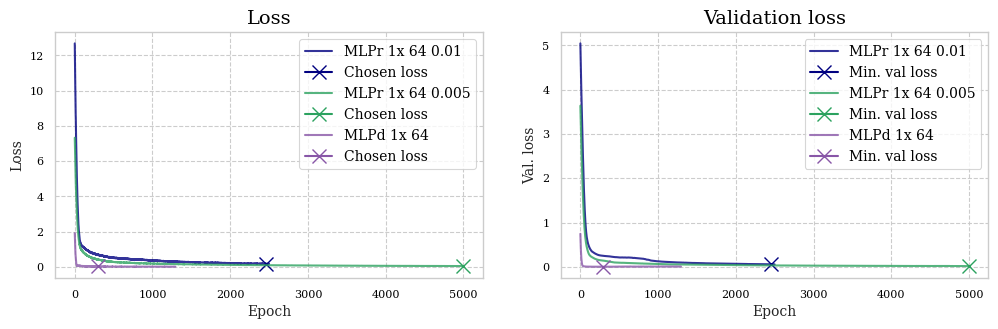

Model prediction scores
+------------------+-------------+------------+
|      Model       | Train score | Test score |
+------------------+-------------+------------+
| MLPr 1x 64 0.01  |    0.9896   |   0.9259   |
| MLPr 1x 64 0.005 |    0.9975   |   0.9313   |
|    MLPd 1x 64    |    0.9976   |   0.922    |
|      linear      |    0.9961   |   0.9031   |
+------------------+-------------+------------+


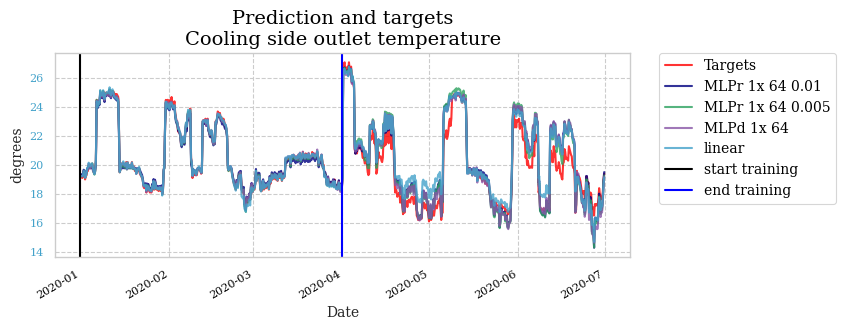

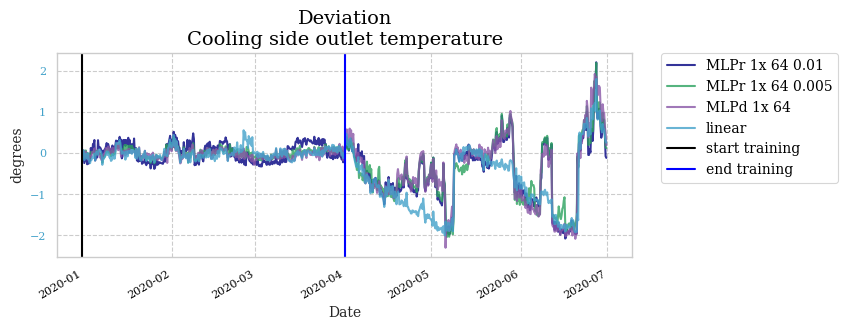

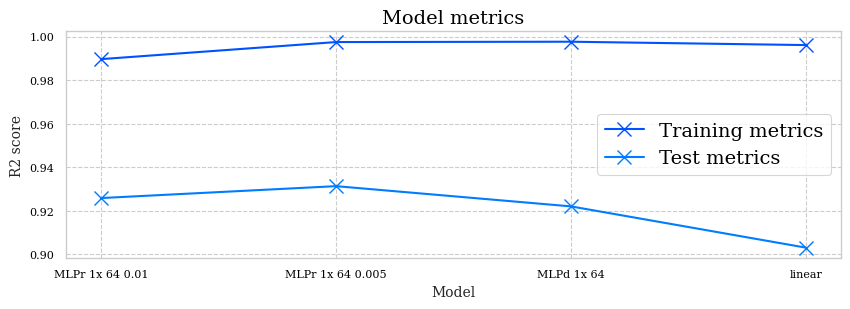

In [5]:
modelList = [
    mlpr5,
    mlpr6,
	mlpd,
	linear_r,
]

mlApi.initModels(modelList)
retrain=False
mlApi.trainModels(retrain)
modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
	plot=True,
	interpol=False,
)

## Model evaluation 2
With the previously discussed models removed, we can easier graph the remaining models. Notice that the model using dropout has converged to a significantly lower loss value, both for the training and validation sample. This model has also converged in a significantly lower amount of epochs.

The R2 score calculated on the training samples indicate that the model with the lowest amount of regularization and the model with dropout has outperformed the linear model. Do note that the R2 score calculated on the test set is not relevant for evaluating model fit, because the test set contains samples with fouling for which we want to predict a certain level of deviation between predicted and measured values. Model fit based on the training data should therefore be evaluated on the validation loss.

Because the testing metrics are not representative of how well the model can predict fouling, we must evaluate the remaining models using a manual approach. First, we notice that the linear model has a shape much alike the added levels of fouling. In fact, it performs much better than all the machine learning models in this regard. All MLP models have very similar predictions, showing a promising general trend. However, they all fail to identify the fouling increase along some parts of the expected-to-be linear increase from 2020-04-01 to 2020-05-05 and from 2020-05-05 to 2020-06-20 as accurately as the linear model.

Although somewhat discouraging with regards to the promise of neural networks' ability to identify fouling, it is important to realize that this is performed on a very limited data sample obtained from simulated values. Most columns of the data set are highly correlated, and the values observed in the data set is unlikely to correspond to a real processing plant. For instance, a very varying rate of cooling medium can be observed right around the time where the MLPs perform poorly, indicating that the models have not obtained sufficient data samples to correctly identify the relation between cooling flow and output temperture.

Model MLPr 2x 64 1.0 was loaded from file
Model MLPr 2x 64 0.5 was loaded from file
Model MLPr 2x 64 0.1 was loaded from file
Model MLPr 2x 64 0.05 was loaded from file
Model MLPr 2x 64 0.01 was loaded from file
Model MLPr 2x 64 0.005 was loaded from file
Model MLPr 2x 64 0.001 was loaded from file
Model MLPd 2x 64 was loaded from file
Training model linear
+------------------+-----------+-------------+---------------+--------+
|      Model       | Min. loss | Chosen loss | Min. val loss | Epochs |
+------------------+-----------+-------------+---------------+--------+
|  MLPr 2x 64 1.0  |  1.179933 |   1.188303  |    0.253844   |  3205  |
|  MLPr 2x 64 0.5  |  1.180287 |   1.187545  |    0.262592   |  2552  |
|  MLPr 2x 64 0.1  |  0.041504 |   0.042629  |    0.015962   |  5000  |
| MLPr 2x 64 0.05  |  0.024019 |   0.028571  |    0.007703   |  5000  |
| MLPr 2x 64 0.01  |  0.010033 |   0.011953  |    0.004557   |  3893  |
| MLPr 2x 64 0.005 |  0.008062 |   0.010374  |    0.003532   |  

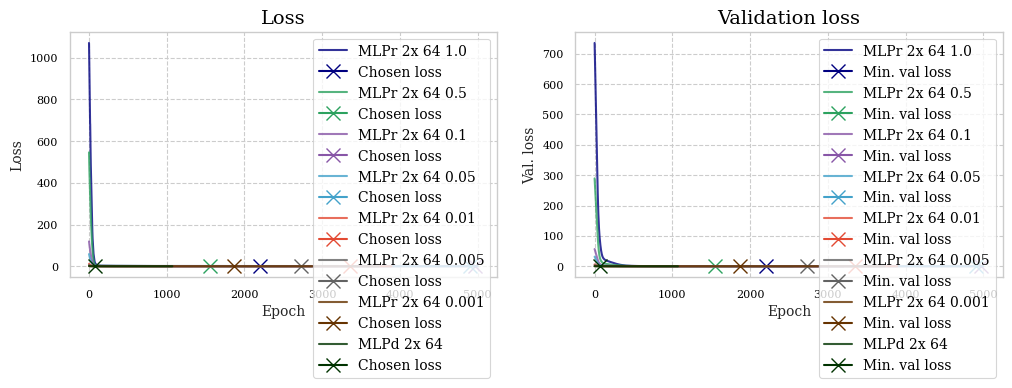

Model prediction scores
+------------------+-------------+------------+
|      Model       | Train score | Test score |
+------------------+-------------+------------+
|  MLPr 2x 64 1.0  |   -0.0002   |  -0.0185   |
|  MLPr 2x 64 0.5  |     -0.0    |  -0.0214   |
|  MLPr 2x 64 0.1  |    0.993    |   0.8865   |
| MLPr 2x 64 0.05  |    0.9866   |   0.9225   |
| MLPr 2x 64 0.01  |    0.9963   |   0.9233   |
| MLPr 2x 64 0.005 |    0.9979   |   0.9274   |
| MLPr 2x 64 0.001 |    0.9972   |   0.9357   |
|    MLPd 2x 64    |    0.9939   |   0.9549   |
|      linear      |    0.9961   |   0.9031   |
+------------------+-------------+------------+


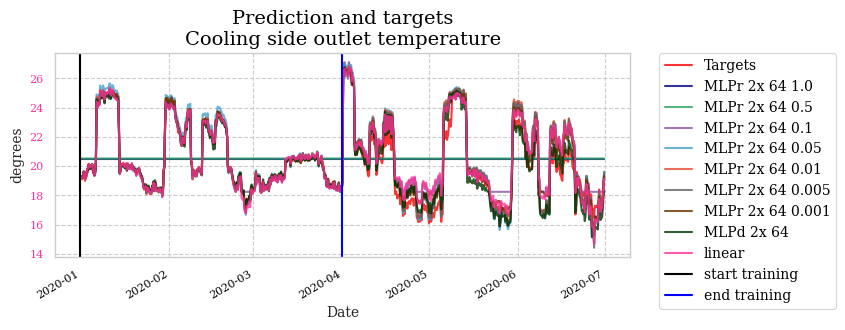

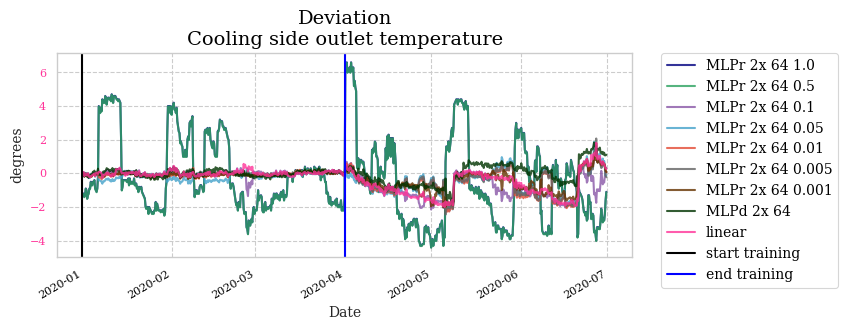

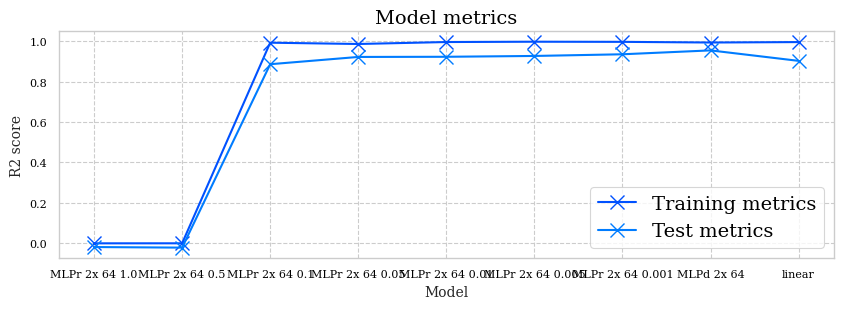

In [6]:
modelList = [
    mlpr11,
    mlpr22,
    mlpr33,
    mlpr44,
    mlpr55,
    mlpr66,
    mlpr77,
	mlpdd,
	linear_r,
]

mlApi.initModels(modelList)
retrain=False
mlApi.trainModels(retrain)
modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
	plot=True,
	interpol=False,
)

## Model evaluation 3
As for the less complex models, we can see from the model metrics that the two models with highest regularization have converged to the dataset mean. Additionally, the following two models with regluarization levels of 0.1 and 0.05 have converged to a state for which some areas of prediction show flat lines. This incidates a combination of input values that the models are not able to identify any degree of variation between, which is highly unlikely for any data sample of varying decimal values. These models can therefore be assumed to have converged to non-generalizing sets of weights despite its relatively low loss values.

Model MLPr 2x 64 0.01 was loaded from file
Model MLPr 2x 64 0.005 was loaded from file
Model MLPr 2x 64 0.001 was loaded from file
Model MLPd 2x 64 was loaded from file
Training model linear
+------------------+-----------+-------------+---------------+--------+
|      Model       | Min. loss | Chosen loss | Min. val loss | Epochs |
+------------------+-----------+-------------+---------------+--------+
| MLPr 2x 64 0.01  |  0.010033 |   0.011953  |    0.004557   |  3893  |
| MLPr 2x 64 0.005 |  0.008062 |   0.010374  |    0.003532   |  3729  |
| MLPr 2x 64 0.001 |  0.003982 |   0.006925  |    0.002662   |  2872  |
|    MLPd 2x 64    |  0.012922 |   0.044509  |    0.00328    |  1073  |
+------------------+-----------+-------------+---------------+--------+


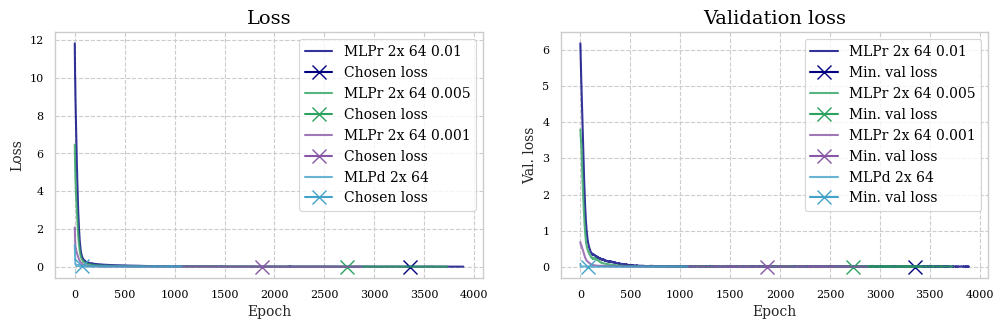

Model prediction scores
+------------------+-------------+------------+
|      Model       | Train score | Test score |
+------------------+-------------+------------+
| MLPr 2x 64 0.01  |    0.9963   |   0.9233   |
| MLPr 2x 64 0.005 |    0.9979   |   0.9274   |
| MLPr 2x 64 0.001 |    0.9972   |   0.9357   |
|    MLPd 2x 64    |    0.9939   |   0.9549   |
|      linear      |    0.9961   |   0.9031   |
+------------------+-------------+------------+


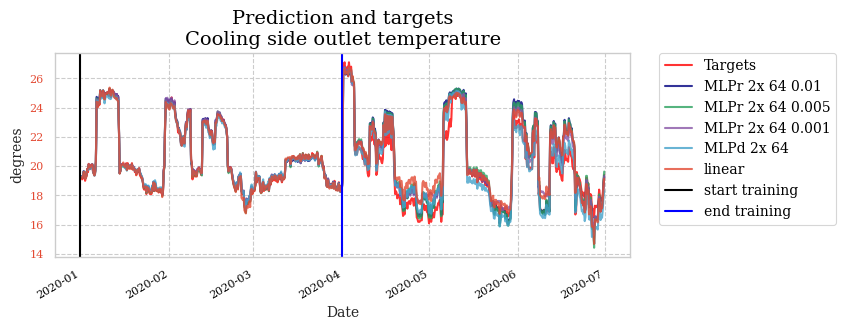

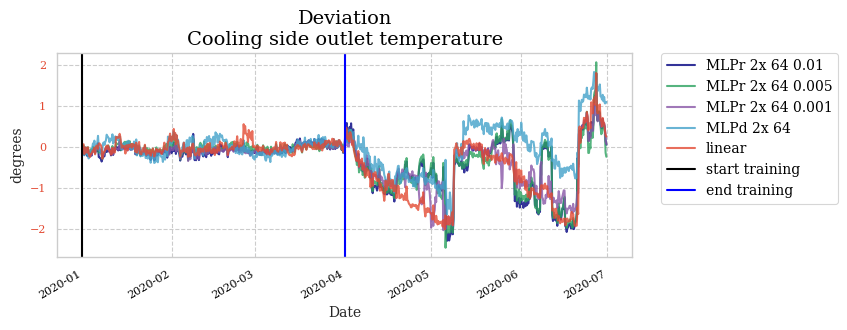

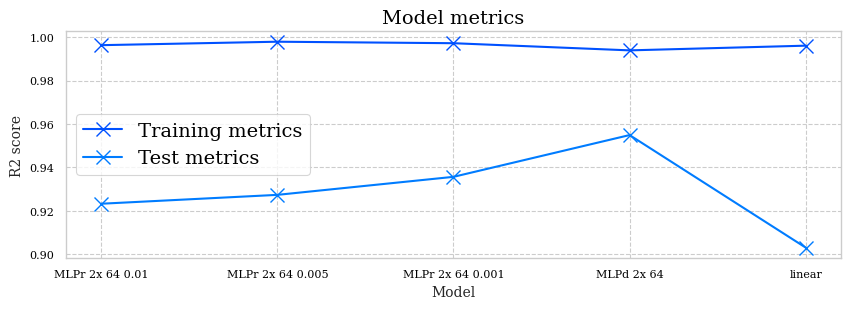

In [7]:
modelList = [
    mlpr55,
    mlpr66,
    mlpr77,
	mlpdd,
	linear_r,
]

mlApi.initModels(modelList)
retrain=False
mlApi.trainModels(retrain)
modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
	plot=True,
	interpol=False,
)

## Model evaluation 4
Again plotting the most promising models to see these in greater detail, we see that most of the models experience the same problems as for the less complex models. One exception is the model using dropout, which appears to form a somewhat more linear line than the remaining MLP models. However, this model fit has other problems visible in the deviation plot. After the fouling is reset around 2020-05-05, this model readjusts to a deviation of approx. 0.5 degrees, significantly more than the other models. The same phenomenom can be seen the second time fouling is reset, around 2020-06-20, this time to an even higher deviation. Due to the number of indivitual weights involved in the model calculations and resulting challenges related to neural network explainability, it's difficult to say why this model performs in this manner. Even so, it is considered encouraging that the model appears more linear than for the less complex model.

## Conclusion
Dropout is preferred for MLP models because it typically results in faster convergence times. The dropout parameter also requires less tuning than the regluarization parameters, as a data set with other means and standard deviations may require a different degree of regluarization in order to converge optimally.

Additional evidence is gathered that it is not arbitrary what hidden layer model structure is chosen for the MLP networks. The calculations performed here suggest complex models (e.g. more than one hidden layer) may be of interest with regards to fouling indication, given that the error observed after fouling is removed can be linked to lack of sufficient training data in the simulated data set rather than shortcompings of the model itself.